# Problem Set 4 -- Energi Data Service

## API link: https://www.energidataservice.dk/tso-electricity/CO2Emis

In [1]:
import json, requests, re
import pandas as pd

#Create lists 
Minutes5UTC = []
Minutes5DK = []
PriceArea = []
CO2Emission = []
Date = []
Month = []

response = requests.get(
    url='https://api.energidataservice.dk/dataset/CO2Emis?limit=250000')

result = response.json()

records = result.get('records', [])

counter = 0
for record in records:
    #while counter < 5:
    Minutes5DK.append(record["Minutes5DK"])
    Minutes5UTC.append(record["Minutes5UTC"])
    PriceArea.append(record["PriceArea"])
    CO2Emission.append(record["CO2Emission"])
    date_time = record["Minutes5DK"]
    date = re.findall(r"[\d]{4}-[\d]{2}-[\d]{2}", date_time)
    month = re.findall(r"[\d]{4}-[\d]{2}", date_time)
    Date.append(date)
    Month.append(month[0])
    
    #print(Date[counter][0])
    check = Date[counter][0]
    
    #Exit after selecting one year data
    if check == '2021-10-30':
        break
    counter+=1
    
#Store in a dataframe
CO2_emission_DK = pd.DataFrame({
                                 'Minutes5DK':Minutes5DK,
                                 'Minutes5UTC':Minutes5UTC,
                                 'PriceArea':PriceArea,
                                 'CO2Emission':CO2Emission,
                                 'Month':Month
                                })

#Export as csv
import os
os.makedirs('/blue/bsc4452/mlilyestrom/Jupyter_content', exist_ok=True)
CO2_emission_DK.to_csv('/blue/bsc4452/mlilyestrom/Jupyter_content/CO2_emission_DK.csv')
print(CO2_emission_DK)

                 Minutes5DK          Minutes5UTC PriceArea  CO2Emission  \
0       2022-11-02T14:45:00  2022-11-02T13:45:00       DK1         71.0   
1       2022-11-02T14:45:00  2022-11-02T13:45:00       DK2         71.0   
2       2022-11-02T14:40:00  2022-11-02T13:40:00       DK1         69.0   
3       2022-11-02T14:40:00  2022-11-02T13:40:00       DK2         69.0   
4       2022-11-02T14:35:00  2022-11-02T13:35:00       DK1         66.0   
...                     ...                  ...       ...          ...   
211718  2021-10-31T00:05:00  2021-10-30T22:05:00       DK1         79.0   
211719  2021-10-31T00:05:00  2021-10-30T22:05:00       DK2         79.0   
211720  2021-10-31T00:00:00  2021-10-30T22:00:00       DK1         75.0   
211721  2021-10-31T00:00:00  2021-10-30T22:00:00       DK2         75.0   
211722  2021-10-30T23:55:00  2021-10-30T21:55:00       DK1         73.0   

          Month  
0       2022-11  
1       2022-11  
2       2022-11  
3       2022-11  
4       2

In [4]:
#Remove data from Nov 2022.

CO2_emission_DK_new = CO2_emission_DK[CO2_emission_DK['Month'].str.contains('2022-11')==False]
print(CO2_emission_DK_new.head)

<bound method NDFrame.head of                  Minutes5DK          Minutes5UTC PriceArea  CO2Emission  \
932     2022-10-31T23:55:00  2022-10-31T22:55:00       DK1         78.0   
933     2022-10-31T23:55:00  2022-10-31T22:55:00       DK2         78.0   
934     2022-10-31T23:50:00  2022-10-31T22:50:00       DK1         74.0   
935     2022-10-31T23:50:00  2022-10-31T22:50:00       DK2         74.0   
936     2022-10-31T23:45:00  2022-10-31T22:45:00       DK1         67.0   
...                     ...                  ...       ...          ...   
211718  2021-10-31T00:05:00  2021-10-30T22:05:00       DK1         79.0   
211719  2021-10-31T00:05:00  2021-10-30T22:05:00       DK2         79.0   
211720  2021-10-31T00:00:00  2021-10-30T22:00:00       DK1         75.0   
211721  2021-10-31T00:00:00  2021-10-30T22:00:00       DK2         75.0   
211722  2021-10-30T23:55:00  2021-10-30T21:55:00       DK1         73.0   

          Month  
932     2022-10  
933     2022-10  
934     2022-10

In [17]:
CO2_emission_DK_new.Month.unique()
CO2_emission_DK_new.PriceArea.unique()

array(['DK1', 'DK2'], dtype=object)

In [6]:
#Show data types
print(CO2_emission_DK_new.dtypes)

Minutes5DK      object
Minutes5UTC     object
PriceArea       object
CO2Emission    float64
Month           object
dtype: object


Text(0.5, 0, 'CO2 Emission in g/kWh')

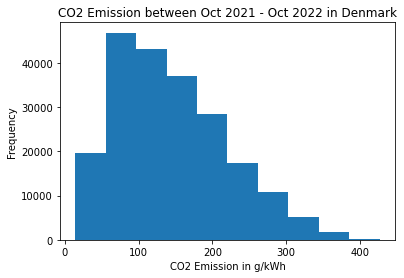

In [15]:
#Generate histogram showing frequencies of varying amounts of CO2 emitted 
from matplotlib import pyplot as plt

CO2_emission_DK_new['CO2Emission'].plot(kind='hist')
plt.title('CO2 Emission between Oct 2021 - Oct 2022 in Denmark')
plt.xlabel('CO2 Emission in g/kWh')

           CO2Emission
PriceArea             
DK1         145.033303
DK2         145.033986


Text(0, 0.5, 'CO2 Emission in g/kWh')

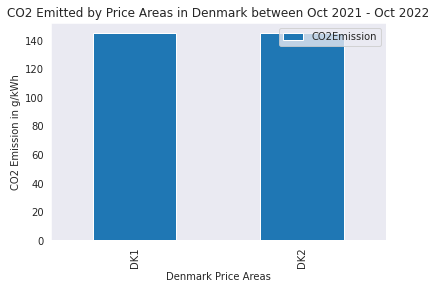

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")

#Aggregate data by Price Area
CO2_emission_price = CO2_emission_DK_new.groupby(["PriceArea"]).mean()
print(CO2_emission_price)

#Plot CO2 Emissions by Price Area
CO2_emission_price.reset_index().plot(
    x="PriceArea", y=["CO2Emission"], kind="bar"
)
plt.title('CO2 Emitted by Price Areas in Denmark between Oct 2021 - Oct 2022')
plt.xlabel('Denmark Price Areas')
plt.ylabel('CO2 Emission in g/kWh')

         CO2Emission
Month               
2021-10    63.946274
2021-11   146.623264
2021-12   196.807236
2022-01   149.418907
2022-02   114.380704
2022-03   218.633131
2022-04   150.660764
2022-05   137.216846
2022-06   124.284259
2022-07    99.310743
2022-08   136.423723
2022-09   155.811574
2022-10   110.491375


Text(0, 0.5, 'CO2 Emission in g/kWh')

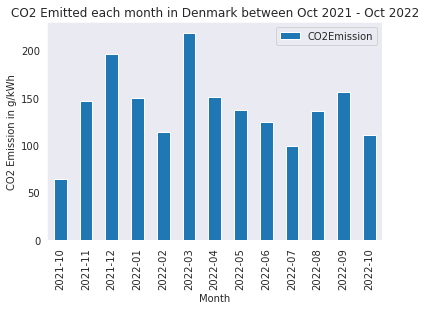

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")

#Aggregate data by Month
CO2_emission_month = CO2_emission_DK_new.groupby(["Month"]).mean()
print(CO2_emission_month)

#Plot CO2 Emissions by Month
CO2_emission_month.reset_index().plot(
    x="Month", y=["CO2Emission"], kind="bar"
)
plt.title('CO2 Emitted each month in Denmark between Oct 2021 - Oct 2022')
plt.xlabel('Month')
plt.ylabel('CO2 Emission in g/kWh')